# ***Laporan Proyek Machine Learning: Books Recommendation System - Vian Sebastian Bromokusumo***


## ***Project Overview***

---

***Latar Belakang***

Menurut survei oleh Badan Pusat Statistik Indonesia yang dipublikasikan pada 7 Juni 2023, jumlah populasi Indonesia adalah sebesar 278,696 juta [[1]](https://www.bps.go.id/id/statistics-table/2/MTk3NSMy/jumlah-penduduk-pertengahan-tahun--ribu-jiwa-.html). Namun sangat disayangkan, menurut survei UNESCO [[2]](https://uis.unesco.org/en/country/id), hanya sekitar 0.001% dari masyarakat Indonesia yang memiliki minat membaca. Hal ini tentunya sangat berpengaruh terhadap tingkat literasi Indonesia, dimana menurut Balai Bahasa Provinsi Sumatera Utara [[3]](https://balaibahasasumut.kemdikbud.go.id/2023/09/07/manca-untuk-literasi-yang-menyenangkan/#:~:text=Dengan%20kata%20lain%2C%20Indonesia%20masuk,2022%20mencapai%2051%2C69%25.), Indonesia masuk dalam 10 negara dengan tingkat literasi terendah. Maka dari itu, diperlukan strategi yang efektif dan efisien untuk meningkatkan minta membaca masyarakat Indonesia, dengan harapan meningkatkan tingkat literasi secara keseluruhan.

Proyek ini difokuskan pada dataset "Book Recommendation Dataset" dengan tujuan untuk menghasilkan suatu Recommendation System yang dapat merekomendasikan buku yang relevan kepada user. Dalam implementasi lanjutannya, harapannya Recommendation System ini dapat memberikan rekomendasi mulai dari literasi ilmiah, buku-buku hiburan, hingga barang-barang dalam bisnis e-commerce dan film-film dalam bisnis perfilman. Jumlah data yang sangat besar dalam dataset ini menjadi salah satu alasan Penulis menggunakan dataset ini, dikarenakan dataset yang besar akan membantu model untuk membangun sistem rekomendasi yang lebih baik dan custom bagi user.  

Menurut Jepchumba dari Microsoft [[4]](https://techcommunity.microsoft.com/t5/educator-developer-blog/getting-started-with-using-visual-machine-learning-tools-for/ba-p/3578397), *machine learning* merupakan teknik yang menggunakan matematika tingkat tinggi dan ilmu statistika untuk mengenali pola pada data yang tidak ada secara eksplisit, dan dapat memprediksi sesuai dengan hasil pola tersebut. Terdapat dua metode yang banyak digunakan dalam domain sistem rekomendasi ini, antara lain Content Based Filtering, dan Collaborative Filtering.

Menurut Google Machine Learning Developers, Content Based Filtering [[5]](https://developers.google.com/machine-learning/recommendation/content-based/basics) merupakan teknik mendapatkan rekomendasi item berdasarkan items yang disukai user, dengan cara menghitung Cosine Similarity antar items. Hal ini tentu sangat berat dalam komputasinya, mengingat dalam kasus nyata, akan ada ribuan hingga jutaan items yang perlu dikaji untuk user. Ditambah lagi, menurut sumber yang sama, Collaborative Filtering [[6]](https://developers.google.com/machine-learning/recommendation/collaborative/basics) merupakan teknik yang mengkaji bukan hanya items yang disukai user, namun komunitas user itu sendiri untuk menghasilkan rekomendasi yang lebih baik. Hal ini tentunya membutuhkan komputasi yang lebih rumit lagi, menggunakan Deep Learning seperti Neural Network. Alhasil, dalam membangun Recommendation System, diperlukan Machine Learning untuk mempercepat dan menghasilkan rekomendasi yang efektif bagi user dan sasaran lainnya.

Proyek ini menjadi sarana kecil untuk membantu meningkatkan minat membaca dan literasi Indonesia, dan hasil dari proyek ini diharapkan dapat membantu Pemerintah, instansi literatur, hingga individual untuk mengembangkan minat membaca dan edukasi literasi.

## ***Business Understanding***

Stakeholder dan sasaran:

1. Pemerintah

  Sebagai organisasi tingkat tertinggi dalam negara, tentunya pemerintah dapat menggunakan Recommendation System untuk meningkatkan minta baca masyarakat. Dengan strategi lainnya yang dapat digunakan oleh pemerintah, sistem rekomendasi yang baik diharapkan dapat mendukung strategi pemerintah dalam meningkatkan minat baca dan literasi Indonesia.

2. Perpustakaan

  Sebagai instansi literatur paling tua di dunia, tentunya perpustakaan-perpustakaan menyimpan ilmu-ilmu yang sudah ada sejak lama. Recommendation System yang baik akan membantu perpustakaan untuk melayani pendatang dan pembaca yang datang untuk mencari berbagai referensi dan literatur lainnya dengan lebih baik.

3. Mesin Pencari

  Bukan hanya perpustakaan, Mesin Pencari seperti Google Scholar sudah menjadi gudang literasi penelitian bagi para ilmuwan dan pelajar yang ingin meningkatkan ilmunya dalam bidang tertentu. Recommendation System yang baik akan membantu pembaca untuk lebih mudah mencari informasi yang berhubungan, guna meningkatkan literasinya dalam ilmu yang didalami.

4. Individu

  Dalam konteks individu, tentunya Recommendation System tidak hanya berguna dalam konteks mencari ilmu, namun juga dapat berguna untuk membantu pembaca-pembaca mencari hiburan seperti buku fiksi dan genre-genre lainnya. Harapannya, output proyek ini dapat mendukung kemajuan literasi per individu.

**Problem Statement**

1. Dengan banyaknya jumlah buku dan genre, apakah Recommendation System yang tepat sasaran (efektif) dapat dibuat?

**Recommendation System Goals**
1. Membuat Recommendation System yang efektif dan tepat sasaran, guna membantu sasaran (perpustakaan, mesin pencari, maupun individu).

**Solution Statements (Metodologi)**
1.  Melakukan Exploratory Data Analysis untuk mendapatkan informasi berguna dalam data dan mengetahui dinamika fitur-fitur.

2. Membuat model machine learning yang dapat merekomendasikan buku dengan tepat sasaran, menggunakan metode Content Based Filtering dan Collaborative Filtering.

3. Menggunakan metrik evaluasi Precision@k dan Root Mean Squared Error untuk mengevaluasi performa model.

### ***Data Understanding***

---

Dataset: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path


books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Machine Learning Implementation/archive (4)/books/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Machine Learning Implementation/archive (4)/books/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Machine Learning Implementation/archive (4)/books/Users.csv')


print(f"books data : {books.shape}")
print(f"ratings data: {ratings.shape}")
print(f"users data: {users.shape}")

<ipython-input-1-20c11cf5c8b2>:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Machine Learning Implementation/archive (4)/books/Books.csv')


books data : (271360, 8)
ratings data: (1149780, 3)
users data: (278858, 3)


In [2]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [3]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

### ***EDA - Univariate Analysis***

---

In [11]:
# ratings dataframe
rating_users = len(ratings['User-ID'].unique())
rated_books = len(ratings['ISBN'].unique())
rating_values = ratings['Book-Rating'].unique()

print(f"rating users: {rating_users}")
print(f"rated books: {rated_books}")
print(f"rating range: {rating_values}")

rating users: 105283
rated books: 340556
rating range: [ 0  5  3  6  8  7 10  9  4  1  2]


In [12]:
# books dataframe
registered_books = len(books['ISBN'].unique())
authors_count = len(books['Book-Author'].unique())
titles_count = len(books['Book-Title'].unique())

print(f"registered books: {registered_books}")
print(f"registered authors: {authors_count}")
print(f"registered titles: {titles_count}")

registered books: 271360
registered authors: 102024
registered titles: 242135


In [13]:
# users dataframe
registered_users = len(users['User-ID'].unique())

print(f"registered users: {registered_users}")

registered users: 278858


*Beberapa hasil dari Univariate Analysis pada data ratings, users, dan books adalah sebagai berikut.*

---



1. dari total user yang terdaftar (278,853 users), hanya 105,283 user yang melakukan rating

2. dari total buku yang terdaftar (271,360 buku), terdapat 340,556 buku yang diberikan rating. Hal ini dapat disebabkan oleh buku yang tidak terdaftar pada data Books, namun ada di ratings.

3. terdapat 102,024 penulis yang terdaftar.

4. rating terdiri dari skala 1-10.

5. Terdapat perbedaan jumlah buku (ISBN) dan judul. Hal ini dapat disebabkan oleh judul yang sama, namun berbeda versi.

### ***Data Preparation***

---

1. Data Merging
2. Missing Values Handling
3. Duplicates Data Handling
4. Data Selection


***Data Merging***

---



In [14]:
books_rate_data = pd.merge(
    ratings,
    books,
    on ='ISBN',
    how ='left'
)

books_rate_data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...


***Missing Values Handling***

---



In [15]:
books_rate_data.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             118644
Book-Author            118645
Year-Of-Publication    118644
Publisher              118646
Image-URL-S            118644
Image-URL-M            118644
Image-URL-L            118648
dtype: int64

In [16]:
books_rate_data = books_rate_data.dropna()
books_rate_data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [17]:
books_rate_data = books_rate_data.sort_values('ISBN', ascending = True)
books_rate_data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
103677,23902,0001046438,9,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
...,...,...,...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...


***Duplicates Data Handling***

---



In [18]:
# check for duplicates
duplicate_count_isbn = books_rate_data.duplicated(subset = ['ISBN']).sum()
duplicate_count_title = books_rate_data.duplicated(subset = ['Book-Title']).sum()

print(f"Number of duplicates in the 'ISBN' column: {duplicate_count_isbn}")
print(f"Number of duplicates in the 'Book-Title' column: {duplicate_count_title}")

Number of duplicates in the 'ISBN' column: 760984
Number of duplicates in the 'Book-Title' column: 790063


In [19]:
books_rate_data = books_rate_data.drop_duplicates('ISBN')
books_rate_data = books_rate_data.drop_duplicates('Book-Title')

books_rate_data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
103677,23902,0001046438,9,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...
...,...,...,...,...,...,...,...,...,...,...
1133069,271705,B0001FZGTO,0,I'll Let You Go: A Novel,Bruce Wagner,2002,Villard,http://images.amazon.com/images/P/B0001FZGTO.0...,http://images.amazon.com/images/P/B0001FZGTO.0...,http://images.amazon.com/images/P/B0001FZGTO.0...
613350,148258,B0001I1KOG,10,New York Public Library Literature Companion,New York Public Library,2001,Free Press,http://images.amazon.com/images/P/B0001I1KOG.0...,http://images.amazon.com/images/P/B0001I1KOG.0...,http://images.amazon.com/images/P/B0001I1KOG.0...
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...


In [20]:
duplicate_count_isbn = books_rate_data.duplicated(subset = ['ISBN']).sum()
duplicate_count_title = books_rate_data.duplicated(subset = ['Book-Title']).sum()

print(f"Number of duplicates in the 'ISBN' column: {duplicate_count_isbn}")
print(f"Number of duplicates in the 'Book-Title' column: {duplicate_count_title}")

Number of duplicates in the 'ISBN' column: 0
Number of duplicates in the 'Book-Title' column: 0


In [21]:
books_rate_data.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

***Data Selection***

---



In [22]:
# Data yang digunakan hanya 30,000 sampel, dikarenakan RAM yang kecil dari Google Collab gratis
books_rate_data = books_rate_data.iloc[:30000,:]

In [23]:
isbn = books_rate_data['ISBN'].tolist()
authors = books_rate_data['Book-Author'].tolist()
titles = books_rate_data['Book-Title'].tolist()

print(len(isbn))
print(len(authors))
print(len(titles))

30000
30000
30000


In [24]:
books_new = pd.DataFrame({
    'ISBN': isbn,
    'Authors': authors,
    'Titles': titles

})

books_new

,ISBN,Authors,Titles
0,0000913154,C. van Amerongen (translator),The Way Things Work: An Illustrated Encycloped...
1,0001010565,Judith Kerr,Mog's Christmas
2,0001046438,Stephen Fry,Liar
3,0001046713,Helen Forrester,Twopence to Cross the Mersey
4,000104687X,T.S. Eliot,"T.S. Eliot Reading \The Wasteland\"" and Other ..."
...,...,...,...
29995,031215108X,Madeleine Wickham,A Desirable Residence
29996,0312151101,Paul Emil Erdman,The Set-Up
29997,0312151179,Victoria Glendinning,Electricity: A Novel
29998,0312151187,Jennifer Egan,Emerald City : Stories


### ***Data Preparation - Collaborative Filtering***

---
1. Encoding and Mapping
2. Fetching Random Samples
3. Train Test Split


In [25]:
df = books_rate_data
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
103677,23902,0001046438,9,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...
...,...,...,...,...,...,...,...,...,...,...
130090,30273,031215108X,0,A Desirable Residence,Madeleine Wickham,1997,St. Martin's Press,http://images.amazon.com/images/P/031215108X.0...,http://images.amazon.com/images/P/031215108X.0...,http://images.amazon.com/images/P/031215108X.0...
361114,87141,0312151101,8,The Set-Up,Paul Emil Erdman,1997,St Martins Pr,http://images.amazon.com/images/P/0312151101.0...,http://images.amazon.com/images/P/0312151101.0...,http://images.amazon.com/images/P/0312151101.0...
500785,121066,0312151179,0,Electricity: A Novel,Victoria Glendinning,1997,St Martins Pr Special,http://images.amazon.com/images/P/0312151179.0...,http://images.amazon.com/images/P/0312151179.0...,http://images.amazon.com/images/P/0312151179.0...
896659,216955,0312151187,5,Emerald City : Stories,Jennifer Egan,1997,Picador,http://images.amazon.com/images/P/0312151187.0...,http://images.amazon.com/images/P/0312151187.0...,http://images.amazon.com/images/P/0312151187.0...


***Encoding and Mapping***

---



In [26]:
user_id = df['User-ID'].unique().tolist()
encode_user_id1 = {x: i for i, x in enumerate(user_id)}
encoded_user_id2 = {i: x for i, x in enumerate(user_id)}

print(f"user ID's : {user_id}")
print(f"encoded user: {encode_user_id1}")
print(f"encoded user ID's: {encoded_user_id2}")

user ID's : [171118, 209516, 23902, 196149, 206300, 244994, 246671, 251613, 166596, 109901, 53729, 76626, 189835, 85526, 95359, 131966, 198711, 10067, 16319, 266866, 26583, 43962, 156534, 274301, 6575, 176062, 110029, 70969, 201017, 96473, 225986, 114216, 11676, 131402, 37724, 56399, 122874, 145927, 175886, 139975, 205429, 266867, 229329, 265595, 110746, 215677, 89514, 69078, 63714, 243930, 201526, 166188, 244602, 184401, 98509, 98499, 93366, 101606, 177458, 13222, 245195, 98510, 106988, 170184, 120565, 233627, 224121, 194500, 122881, 216749, 246617, 189733, 193560, 227436, 181077, 114066, 14449, 204946, 249111, 222586, 189334, 268932, 93162, 130085, 262998, 68743, 17507, 129598, 98573, 103515, 27617, 36836, 217121, 28602, 138844, 86835, 52441, 263637, 161619, 11601, 159506, 180651, 166670, 93740, 61147, 107697, 91449, 274111, 68760, 28204, 147166, 111550, 76942, 22023, 5899, 214528, 25489, 35050, 96493, 173018, 227538, 133008, 172742, 86243, 29070, 259378, 265031, 206979, 182987, 2638

In [27]:
title = df['Book-Title'].unique().tolist()
encode_title1 = {x: i for i, x in enumerate(title)}
encoded_title2 = {i: x for i, x in enumerate(title)}

print(f"resto's : {title}")
print(f"encoded resto: {encode_title1}")
print(f"encoded resto's: {encoded_title2}")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
df['user'] = df['User-ID'].map(encode_user_id1)
df['books'] = df['Book-Title'].map(encode_title1)

df

<ipython-input-28-804a9fae34b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['User-ID'].map(encode_user_id1)
<ipython-input-28-804a9fae34b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['books'] = df['Book-Title'].map(encode_title1)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,user,books
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,0,0
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,1,1
103677,23902,0001046438,9,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,2,2
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,3,3
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
130090,30273,031215108X,0,A Desirable Residence,Madeleine Wickham,1997,St. Martin's Press,http://images.amazon.com/images/P/031215108X.0...,http://images.amazon.com/images/P/031215108X.0...,http://images.amazon.com/images/P/031215108X.0...,1828,29995
361114,87141,0312151101,8,The Set-Up,Paul Emil Erdman,1997,St Martins Pr,http://images.amazon.com/images/P/0312151101.0...,http://images.amazon.com/images/P/0312151101.0...,http://images.amazon.com/images/P/0312151101.0...,740,29996
500785,121066,0312151179,0,Electricity: A Novel,Victoria Glendinning,1997,St Martins Pr Special,http://images.amazon.com/images/P/0312151179.0...,http://images.amazon.com/images/P/0312151179.0...,http://images.amazon.com/images/P/0312151179.0...,8949,29997
896659,216955,0312151187,5,Emerald City : Stories,Jennifer Egan,1997,Picador,http://images.amazon.com/images/P/0312151187.0...,http://images.amazon.com/images/P/0312151187.0...,http://images.amazon.com/images/P/0312151187.0...,8950,29998


In [29]:
num_users = len(df['user'].unique())
num_books = len(df['books'].unique())
min_rating = min(df['Book-Rating'])
max_rating = max(df['Book-Rating'])

print(f"number of users: {num_users}")
print(f"number of books: {num_books}")
print(f"min rating: {min_rating}")
print(f"max rating: {max_rating}")

number of users: 8951
number of books: 30000
min rating: 0
max rating: 10


***Fetching Random Samples***

---



In [30]:
df = df.sample(frac = 1, random_state = 123)
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,user,books
911747,222054,0283995068,8,Spencer Tracy: Tragic idol,Bill Davidson,1987,Sidgwick &amp; Jackson,http://images.amazon.com/images/P/0283995068.0...,http://images.amazon.com/images/P/0283995068.0...,http://images.amazon.com/images/P/0283995068.0...,339,25665
972193,234672,0140237291,0,Fever Pitch,Nick Hornby,1994,Penguin USA,http://images.amazon.com/images/P/0140237291.0...,http://images.amazon.com/images/P/0140237291.0...,http://images.amazon.com/images/P/0140237291.0...,6158,16464
125848,28938,0192822837,0,Frankenstein or the Modern Prometheus: The 181...,Mary Wollstonecraft Shelley,1994,Oxford University Press,http://images.amazon.com/images/P/0192822837.0...,http://images.amazon.com/images/P/0192822837.0...,http://images.amazon.com/images/P/0192822837.0...,693,22386
1010675,242409,0062517244,9,Fruitflesh: Seeds of Inspiration for Women Who...,Gayle Brandeis,2002,HarperSanFrancisco,http://images.amazon.com/images/P/0062517244.0...,http://images.amazon.com/images/P/0062517244.0...,http://images.amazon.com/images/P/0062517244.0...,395,10149
1138768,274061,0061052248,10,Peter S. Beagle's Immortal Unicorn,Peter S. Beagle,1995,Harper Collins Canada,http://images.amazon.com/images/P/0061052248.0...,http://images.amazon.com/images/P/0061052248.0...,http://images.amazon.com/images/P/0061052248.0...,763,8729
...,...,...,...,...,...,...,...,...,...,...,...,...
215812,50547,0310597811,0,Let's Talk: An Honest Conversation on Critical...,C. Everett Koop,1992,Zondervan,http://images.amazon.com/images/P/0310597811.0...,http://images.amazon.com/images/P/0310597811.0...,http://images.amazon.com/images/P/0310597811.0...,2866,28636
1001261,240318,0140351078,0,"Frankenstein, or the Modern Prometheus (Puffin...",Mary Wollstonecraft Shelley,1989,Penguin USA,http://images.amazon.com/images/P/0140351078.0...,http://images.amazon.com/images/P/0140351078.0...,http://images.amazon.com/images/P/0140351078.0...,6539,17730
481452,114868,0307701018,0,The Golden Book Encyclopedia,Western Publishing Company,1988,Golden Books,http://images.amazon.com/images/P/0307701018.0...,http://images.amazon.com/images/P/0307701018.0...,http://images.amazon.com/images/P/0307701018.0...,1294,28030
662716,160819,0140157972,0,Fire and Civilization,Johan Goudsblom,1995,Penguin USA,http://images.amazon.com/images/P/0140157972.0...,http://images.amazon.com/images/P/0140157972.0...,http://images.amazon.com/images/P/0140157972.0...,1694,15725


***Train Test Split***

---



In [31]:
x = df[['user', 'books']].values
y = df['Book-Rating'].apply(lambda x: (x - min_rating)/ (max_rating - min_rating))

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

### ***Model Development - Content Based Filtering***

---
1. Vectorizer Calculations
2. Cosine Similarity Calculations
3. Recommendation Retrieval Function Initalization
4. Sample Retrieval
5. Recommendation Result -- Top-N Recommendation


In [32]:
data = books_new
data

,ISBN,Authors,Titles
0,0000913154,C. van Amerongen (translator),The Way Things Work: An Illustrated Encycloped...
1,0001010565,Judith Kerr,Mog's Christmas
2,0001046438,Stephen Fry,Liar
3,0001046713,Helen Forrester,Twopence to Cross the Mersey
4,000104687X,T.S. Eliot,"T.S. Eliot Reading \The Wasteland\"" and Other ..."
...,...,...,...
29995,031215108X,Madeleine Wickham,A Desirable Residence
29996,0312151101,Paul Emil Erdman,The Set-Up
29997,0312151179,Victoria Glendinning,Electricity: A Novel
29998,0312151187,Jennifer Egan,Emerald City : Stories


***Vectorizer Calculations***

---



In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()

vect.fit(data['Titles'])
vect.get_feature_names_out()

array(['000', '0004725018', '001', ..., 'zucchini', 'zuleika', 'zulu'],
      dtype=object)

In [34]:
tfidf_matrix = vect.fit_transform(data['Titles'])

tfidf_matrix.shape

(30000, 19180)

In [35]:
print(tfidf_matrix)

  (0, 16994)	0.4189539012660068
  (0, 12230)	0.13340358452786935
  (0, 5953)	0.4076912596688266
  (0, 8743)	0.3937675024753747
  (0, 1037)	0.2598331619355861
  (0, 18917)	0.3708025114182506
  (0, 17168)	0.3882373926446456
  (0, 18534)	0.3448517136740893
  (0, 17115)	0.1037176506003908
  (1, 3535)	0.538022564935687
  (1, 11382)	0.8429304358130774
  (2, 10082)	1.0
  (3, 11072)	0.6115709137320052
  (3, 4491)	0.44835151070915424
  (3, 17337)	0.19953379856395034
  (3, 17810)	0.6115709137320052
  (3, 17115)	0.10549512324965621
  (4, 13260)	0.3484814241101871
  (4, 12416)	0.29633379613733835
  (4, 1059)	0.16327435024586118
  (4, 18497)	0.564210971957326
  (4, 14111)	0.3823310960763117
  (4, 5845)	0.5368714297161788
  (4, 17115)	0.10651969263626308
  (5, 2673)	0.560368372016978
  :	:
  (29992, 1796)	0.7071067811865475
  (29992, 3554)	0.7071067811865475
  (29993, 4410)	0.37727090921850626
  (29993, 3643)	0.3018230612859928
  (29993, 18982)	0.29197861279803455
  (29993, 6609)	0.5081971611114892


In [36]:
a = tfidf_matrix.todense()

In [37]:
pd.DataFrame(
    # tfidf_matrix.todense(),
    a,
    columns = vect.get_feature_names_out(),
    index = data.Titles
).sample(22, axis = 1).sample(10, axis = 0)

,bryson,rigby,madeira,reach,beneath,malindine,chair,atuan,dixie,1890,...,mcqueen,whizzard,melancholy,outlets,wardrobe,orsinian,longitude,costume,enginee,suburban
Titles,,,,,,,,,,,,,,,,,,,,,
Rebecca: The Screenplay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Trouble with Computers: Usefulness, Usability, and Productivity",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Not a Penny More, Not a Penny Less",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Elizabeth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Frommer's Belgium, Holland &amp; Luxembourg (5th ed)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cutting Loose: Why Women Who End Their Marriages Do So Well,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Penguin Book of Curious and Interesting Puzzles (Penguin Science),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Thing About Men (Avon Romance),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Indiana Winter (Indiana),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Cosine Similarity Calculations***

---



In [38]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(tfidf_matrix)
sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.26110974],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26110974, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [39]:
sim_df = pd.DataFrame(
    sim,
    index = data['Titles'],
    columns = data['Titles']
)

sim_df.sample(5, axis = 1).sample(10, axis = 0)

Titles,Brain Dead,The Starship and the Canoe,Let's Go to the Airport (A little golden book),Carry Me Back,A little of what you fancy
Titles,,,,,
Portrait of the Artist as a Young Man,0.0,0.028358,0.013675,0.0,0.027198
Baby Donald's Busy Play Group: Illustrated by Darrell Baker (Golden Sturdy Shape Book),0.0,0.000000,0.079894,0.0,0.000000
Weekend Life Coach,0.0,0.000000,0.000000,0.0,0.000000
Astrology and the Art of Healing,0.0,0.071889,0.015941,0.0,0.031704
Fresh from the Freezer,0.0,0.029851,0.014396,0.0,0.000000
The Art of Kissing,0.0,0.038442,0.018539,0.0,0.036870
Ideal Bakery,0.0,0.000000,0.000000,0.0,0.000000
Queen Katherine Parr,0.0,0.000000,0.000000,0.0,0.000000
Last Chance High: How Girls and Boys Drop in and Out of Alternative Schools,0.0,0.040907,0.000000,0.0,0.016699


***Recommendation Retrieval Function Initialization***

---



In [40]:
def book_recommendations(Titles, similarity_data = sim_df, items = data[['ISBN', 'Authors', 'Titles']], k = 5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    Title : tipe data string (str)
                Judul Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,Titles].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop Titles agar Judul Buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(Titles, errors = 'ignore')

    return pd.DataFrame(closest).merge(items).head(k)

***Sample Retrieval***

---



In [41]:
data[data.Titles.eq('Sleep Deep')]

,ISBN,Authors,Titles
12424,009181460X,Kenton,Sleep Deep


***Recommendation Result -- Top-N Recommendation***

---



In [42]:
book_recommendations('Sleep Deep')

,Titles,ISBN,Authors
0,The deep,0233967931,Peter Benchley
1,House of Sleep,0140250832,Jonathan Coe
2,The Little Book of Sleep,0140280693,Paul Wilson
3,Doctor Sleep,0151261008,Madison Smartt Bell
4,Deep in the Heart,0061083267,Sharon Sala


### ***Model Development - Collaborative Filtering***

---

1. Model Class Initialization
2. Callback Functions Initialization
3. Model Compilation
4. Model Training
5. Sample Retrieval
6. Prediction Result -- Top-N Recommendation


***Model Class Initialization***


---




In [43]:
class RecommenderNet(tf.keras.Model):


  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.books_embedding = layers.Embedding( # layer embeddings books
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.books_bias = layers.Embedding(num_books, 1) # layer embedding books bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    books_vector = self.books_embedding(inputs[:, 1]) # memanggil layer embedding 3
    books_bias = self.books_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_books = tf.tensordot(user_vector, books_vector, 2)

    x = dot_user_books + user_bias + books_bias

    return tf.nn.sigmoid(x)

***Callback Functions Initialization***

---



In [44]:
# implementing callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reduction = ReduceLROnPlateau(
    monitor = 'root_mean_squared_error',
    patience = 3,
    verbose = 1,
    factor = 0.1,
    min_lr = 0.000001
)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    rmse = logs.get('root_mean_squared_error')
    val_rmse = logs.get('val_root_mean_squared_error')

    if(rmse < 0.2):
      print("\nReached wanted accuracy so cancelling training!")
      self.model.stop_training = True

earlyStop = myCallback()

***Model Compilation***

---



In [45]:
# model initialization
model = RecommenderNet(num_users, num_books, 50)

# model compiling
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.optimizers.Adam(learning_rate = 0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

***Model Training***

---



In [46]:
# model training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 40,
    verbose = 1,
    validation_data = (x_val, y_val),
    callbacks = [lr_reduction, earlyStop]
)

Epoch 1/40
3000/3000 [==============================] - 89s 29ms/step - loss: 0.6732 - root_mean_squared_error: 0.4268 - val_loss: 0.6536 - val_root_mean_squared_error: 0.4156 - lr: 0.0010
Epoch 2/40
3000/3000 [==============================] - 76s 25ms/step - loss: 0.5806 - root_mean_squared_error: 0.3720 - val_loss: 0.6297 - val_root_mean_squared_error: 0.4012 - lr: 0.0010
Epoch 3/40
3000/3000 [==============================] - 79s 26ms/step - loss: 0.5431 - root_mean_squared_error: 0.3514 - val_loss: 0.6133 - val_root_mean_squared_error: 0.3921 - lr: 0.0010
Epoch 4/40
3000/3000 [==============================] - 84s 28ms/step - loss: 0.5151 - root_mean_squared_error: 0.3344 - val_loss: 0.5993 - val_root_mean_squared_error: 0.3846 - lr: 0.0010
Epoch 5/40
3000/3000 [==============================] - 81s 27ms/step - loss: 0.4941 - root_mean_squared_error: 0.3217 - val_loss: 0.5883 - val_root_mean_squared_error: 0.3787 - lr: 0.0010
Epoch 6/40
3000/3000 [==============================] -

***Sample Retrieval***

---



In [47]:
# retrieving sample
user_id = df['User-ID'].sample(1).iloc[0]
rated_books = df[df['User-ID'] == user_id]

unrated_books = df[~df['Book-Title'].isin(rated_books['Book-Title'].values)]['Book-Title']
unrated_books = list(
    set(unrated_books)
    .intersection(set(encode_title1.keys()))
)

unrated_books = [[encode_title1.get(x)] for x in unrated_books]
user_encoder = encode_user_id1.get(user_id)
user_books_array = np.hstack(
    ([[user_encoder]] * len(unrated_books), unrated_books)
)

In [48]:
rated_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,user,books
816916,198711,0307302989,0,Disney's the Hunchback of Notre Dame (Little G...,Justine Korman,1996,Random House Childrens Books,http://images.amazon.com/images/P/0307302989.0...,http://images.amazon.com/images/P/0307302989.0...,http://images.amazon.com/images/P/0307302989.0...,16,27855
816851,198711,0307167003,0,Piggy's House (Little Look-in Board Book),Western Promotional Books,1993,Golden Books,http://images.amazon.com/images/P/0307167003.0...,http://images.amazon.com/images/P/0307167003.0...,http://images.amazon.com/images/P/0307167003.0...,16,27531
816929,198711,0307602958,0,Pick of the Litter (Little Golden Readers/Poun...,Teddy Slater,1986,Goldencraft,http://images.amazon.com/images/P/0307602958.0...,http://images.amazon.com/images/P/0307602958.0...,http://images.amazon.com/images/P/0307602958.0...,16,27940
816234,198711,0061066443,0,New Adventures of Mary-Kate &amp; Ashley #22: ...,Mary-Kate &amp; Ashley Olsen,2001,HarperEntertainment,http://images.amazon.com/images/P/0061066443.0...,http://images.amazon.com/images/P/0061066443.0...,http://images.amazon.com/images/P/0061066443.0...,16,9167
816145,198711,0060213523,0,The Big Balloon Race/Newly Illustrated Edition...,Eleanor Coerr,1992,Harpercollins Juvenile Books,http://images.amazon.com/images/P/0060213523.0...,http://images.amazon.com/images/P/0060213523.0...,http://images.amazon.com/images/P/0060213523.0...,16,4770
...,...,...,...,...,...,...,...,...,...,...,...,...
816764,198711,0307123138,0,Piggy's Playground,Amye Rosenberg,1984,Golden Books,http://images.amazon.com/images/P/0307123138.0...,http://images.amazon.com/images/P/0307123138.0...,http://images.amazon.com/images/P/0307123138.0...,16,27196
816212,198711,0061044342,0,Brewing up a Storm (John Putnam Thatcher Myste...,Emma Lathen,1998,HarperTorch,http://images.amazon.com/images/P/0061044342.0...,http://images.amazon.com/images/P/0061044342.0...,http://images.amazon.com/images/P/0061044342.0...,16,8652
816084,198711,0020184700,0,The case of the constant suicides,John Dickson Carr,1985,Collier Books,http://images.amazon.com/images/P/0020184700.0...,http://images.amazon.com/images/P/0020184700.0...,http://images.amazon.com/images/P/0020184700.0...,16,1222
816119,198711,0030180910,0,Very Worried Walrus (Sweet Pickles Series),Richard Hefter,1977,Henry Holt &amp; Co (J),http://images.amazon.com/images/P/0030180910.0...,http://images.amazon.com/images/P/0030180910.0...,http://images.amazon.com/images/P/0030180910.0...,16,2624


***Prediction Result -- Top-N Recommendation***

---



In [49]:
# model prediction
ratings = model.predict(user_books_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_books_ids = [
    encoded_title2.get(unrated_books[x][0]) for x in top_ratings_indices
]

# showing results
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 50)
print('Books with high ratings from user')
print('----' * 50)

top_books_user = (
    rated_books.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    ['Book-Title'].values
)

books_df_rows = df[df['Book-Title'].isin(top_books_user)]
books_df_rows = books_df_rows.rename(columns = {'Book-Title':'Title'})
books_df_rows = books_df_rows.rename(columns = {'Book-Author':'Author'})
for row in books_df_rows.itertuples():
    print(row.Title, ':', row.ISBN, ':', row.Author)

print('----' * 50)
print('Top 10 books recommendation')
print('----' * 50)

recommended_books = df[df['Book-Title'].isin(recommended_books_ids)]
recommended_books = recommended_books.rename(columns = {'Book-Title':'Title'})
recommended_books = recommended_books.rename(columns = {'Book-Author':'Author'})

for row in recommended_books.itertuples():
    print(row.Title, ':', row.ISBN, ':', row.Author)

927/927 [==============================] - 2s 2ms/step
Showing recommendations for users: 198711
Books with high ratings from user
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Disney's the Hunchback of Notre Dame (Little Golden Books) : 0307302989 : Justine Korman
The Berenstain Bears and the Spooky Fun House (Golden Sight 'n' Sound) : 0307740137 : Stan Berenstain
Bye-Bye Diapers (Muppet Babies Big Steps) : 030712326X : Ellen Weiss
A Bird's Best Friend (A Growing Up Book) : 030712018X : Tish Sommers
Toy Story 2 (Look-Look Book) : 0307132544 : Diane Muldrow
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Top 10 books recommendation
----------------------------------------------------

In [50]:
top_books_user

array(["Disney's the Hunchback of Notre Dame (Little Golden Books)",
       'Toy Story 2 (Look-Look Book)',
       "A Bird's Best Friend (A Growing Up Book)",
       'Bye-Bye Diapers (Muppet Babies Big Steps)',
       "The Berenstain Bears and the Spooky Fun House (Golden Sight 'n' Sound)"],
      dtype=object)

In [51]:
books_df_rows

,User-ID,ISBN,Book-Rating,Title,Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,user,books
816916,198711,0307302989,0,Disney's the Hunchback of Notre Dame (Little G...,Justine Korman,1996,Random House Childrens Books,http://images.amazon.com/images/P/0307302989.0...,http://images.amazon.com/images/P/0307302989.0...,http://images.amazon.com/images/P/0307302989.0...,16,27855
816936,198711,0307740137,0,The Berenstain Bears and the Spooky Fun House ...,Stan Berenstain,1991,Random House Childrens Books,http://images.amazon.com/images/P/0307740137.0...,http://images.amazon.com/images/P/0307740137.0...,http://images.amazon.com/images/P/0307740137.0...,16,28042
816766,198711,030712326X,0,Bye-Bye Diapers (Muppet Babies Big Steps),Ellen Weiss,1991,Golden Books,http://images.amazon.com/images/P/030712326X.0...,http://images.amazon.com/images/P/030712326X.0...,http://images.amazon.com/images/P/030712326X.0...,16,27205
816753,198711,030712018X,0,A Bird's Best Friend (A Growing Up Book),Tish Sommers,1986,Random House Childrens Books,http://images.amazon.com/images/P/030712018X.0...,http://images.amazon.com/images/P/030712018X.0...,http://images.amazon.com/images/P/030712018X.0...,16,27134
816829,198711,0307132544,0,Toy Story 2 (Look-Look Book),Diane Muldrow,1999,Golden Books,http://images.amazon.com/images/P/0307132544.0...,http://images.amazon.com/images/P/0307132544.0...,http://images.amazon.com/images/P/0307132544.0...,16,27406


### ***Evaluation***

---



***Prediction Result - Content Based Filtering***

In [52]:
book_recommendations('Sleep Deep')

,Titles,ISBN,Authors
0,The deep,0233967931,Peter Benchley
1,House of Sleep,0140250832,Jonathan Coe
2,The Little Book of Sleep,0140280693,Paul Wilson
3,Doctor Sleep,0151261008,Madison Smartt Bell
4,Deep in the Heart,0061083267,Sharon Sala


***Recommedation System Precision***

$$Precision@k = \frac{Rr}{Ra}$$

  dimana,

  - Precision@k = presisi dari k-prediksi rekomendasi
  - Rr = jumlah rekomendasi relevan
  - Ra = jumlah seluruh rekomendasi

---

Hasil dari model Content Based Filtering ini sangat baik, dikarenakan rekomendasi yang dibuat dari model menghasilkan 5/5 rekomendasi relevan dengan input, yaitu buku-buku yang memiliki kata kunci kemiripan dengan input, yaitu 'Sleep' dan 'Deep'

***Metric Visualization -  Collaborative Filtering***




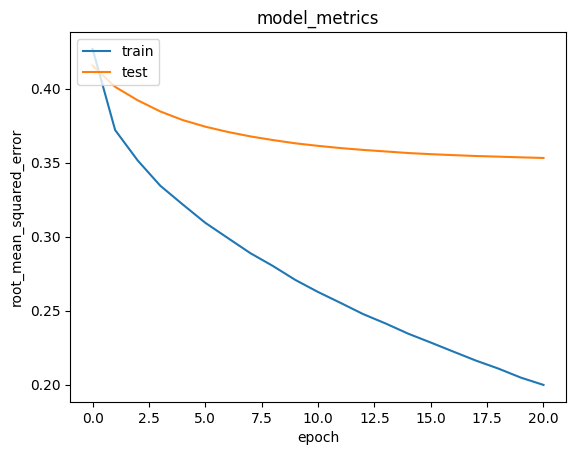

In [53]:
# plot results
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Pada hasil training dan validasi ini, meskipun pada grafik terlihat RMSE test dan train berbeda jauh, nilainya secara berurutan adalah sebagai berikut:

- root_mean_squared_error: 0.1998
- val_root_mean_squared_error: 0.3531

Ketika dihitung, dapat diketahui bahwa perbedaan RMSE dan validation RMSE hanya ~0.16, sehingga perbedaannya tidak terlalu signifikan. Alhasil, model Collaborative Filtering ini tidak overfit, melainkan sebuah model good fit.

---



### ***Hasil dan Kesimpulan Proyek***

Berdasarkan dari hasil Data Understanding, Data Preparation, Model Development, dan Evaluation, kesimpulan Proyek ini dapat disimpulkan sebagai berikut.

1. Menjawab Problem Statement 1: Dengan banyaknya jumlah buku dan user yang ada, Recommendation System efektif **dapat dibuat dengan baik.**
2. Jalannya proyek ini sudah sesuai dan memuaskan Penulis, dimulai dari menjawab Problem Statement, mencapai Recommendation System Goals yang dirumuskan, serta dapat mengevaluasi performa dengan baik. Alhasil, harapannya proyek ini dapat menjadi sarana bagi sasaran-sasaran yang sudah diuraikan, dan menjadi referensi bagi pelajar-pelajar Machine Learning, terutama pembuat Recommendation System.